In [14]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from grid_search import generate_w, get_best_parameters,grid_search
from costs import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [15]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.solve(tx.T@tx,tx.T@y)
    return compute_loss(y,tx,w), w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [16]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    grid_w0,grid_w1 = generate_w(num_intervals=10)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}".format(l=loss_star, w0=w0_star, w1=w1_star))
    
    ls_loss, ls_w = least_squares(y,tx)
    print("Least Square: loss*={l}, w0*={w0}".format(l=ls_loss, w0=ls_w,))
    
    return

Test it here

In [17]:
test_your_least_squares()

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686
Least Square: loss*=30.771775737658796, w0*=[73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [18]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [19]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    poly_matrix = np.array(np.ones(len(x)))
    for d in range(1,degree+1) :
        poly_matrix = (np.vstack((poly_matrix,x**d)))
        
    return poly_matrix


        

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [20]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        poly_matrix = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        loss, weights = least_squares(y, poly_matrix.T)
        rmse = np.sqrt(2*loss)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.6673335515781588
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3]
Processing 2th experiment, degree=3, rmse=0.3656912697732369
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3]
Processing 3th experiment, degree=7, rmse=0.35307072460843486
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3]
Processing 4th experiment, degree

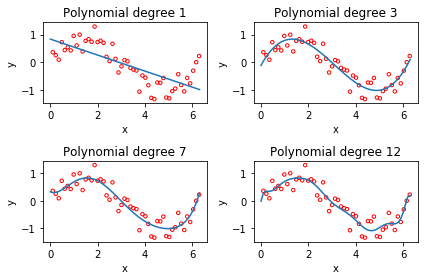

In [21]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [23]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for a in range(len(y)):
        if np.random.uniform() <= ratio :
            x_train.append(x[a])
            y_train.append(y[a])
        else :
            x_test.append(x[a])
            y_test.append(y[a])
    return np.array(x_train) , np.array(x_test) , np.array(y_train) , np.array(y_test)



Then, test your `split_data` function below.

In [24]:
from costs import *
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train , x_test , y_train , y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_train = build_poly(x_train,degree)
    poly_test = build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    loss,weigth = least_squares(y_train,poly_train.T)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*loss)
    rmse_te = np.sqrt(2*compute_loss(y_test,poly_test.T,weigth))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [25]:
seed = 5
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.677, Testing RMSE=0.597
proportion=0.9, degree=3, Training RMSE=0.372, Testing RMSE=0.329
proportion=0.9, degree=7, Training RMSE=0.358, Testing RMSE=0.325
proportion=0.9, degree=12, Training RMSE=0.350, Testing RMSE=0.308
proportion=0.5, degree=1, Training RMSE=0.733, Testing RMSE=0.761
proportion=0.5, degree=3, Training RMSE=0.392, Testing RMSE=0.349
proportion=0.5, degree=7, Training RMSE=0.351, Testing RMSE=0.437
proportion=0.5, degree=12, Training RMSE=0.325, Testing RMSE=0.466
proportion=0.1, degree=1, Training RMSE=0.656, Testing RMSE=1.067
proportion=0.1, degree=3, Training RMSE=0.196, Testing RMSE=0.598
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=5.657
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=40.143


# 3 Ridge Regression
Please fill in the function below.

In [31]:
from costs import *
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = np.linalg.inv(tx.T@tx + (lambda_/(len(y)*2))*np.identity(tx.shape[1])) @tx.T@y
    return compute_loss(y,tx,w) ,w


In [32]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train ,x_test ,y_train , y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_train = build_poly(x_train,degree)
    poly_test = build_poly(x_test,degree)
    print(poly_train)
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        loss ,w = ridge_regression(y_train,poly_train.T,lambda_)
        rmse_tr.append(np.sqrt(2*loss))
        rmse_te.append(np.sqrt(2*compute_loss(y_test,poly_test.T,w)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [4.89512330e+00 1.86662437e+00 3.50706129e+00 3.38087384e+00
  7.30937276e-01 3.88562366e+00 5.65224803e+00 6.28318531e+00
  2.37137419e+00 6.04749821e-01 3.63324875e+00 8.57124731e-01
  2.49756165e+00 1.61424946e+00 5.39987312e+00 6.15699785e+00
  6.03081040e+00 4.78562366e-01 2.87612401e+00 4.516

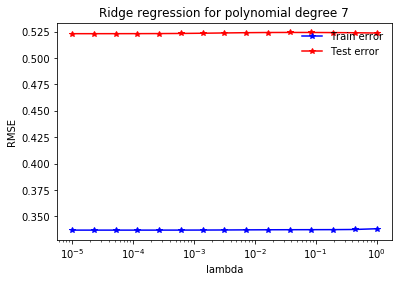

In [33]:
seed = 56
degree = 7
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)